# 1. Experiments - Burgers' Equation

Step-by-step guide for reproducing results featured in ``Staying in the Loop:
Adaptive Sampling with LQR-augmented
Neural Network Controls''

In [1]:
import os, time, tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import algorithm, burgersproblem, controller, generate, plotting, simulate, utilities

config = burgersproblem.MakeConfig(
        t1_sim=30,
        t1_scale = 6/5,
        t1_max=150.,
        n_trajectories_train_fixed=40,
        n_trajectories_initial_adaptive=5,
        n_trajectories_val=100,
        batch_ratio=0.025,
        n_trajectories_test=100,
        n_hidden=5,
        n_neurons=32,
        optimizer='AdamOptimizer',
        C=0.001,
        M=1.2,
        r=10,
        Nc=1000,
        gradient_loss_weight=10,
        n_epochs=10)

OCP = burgersproblem.MakeOCP(
        n_states=64,
        n_controls=2,
        nu=0.02,
        beta=0.01
)
problem_dir = os.path.join(burgersproblem.root_dir , 'results', 'Burgers')
data_dir = os.path.join(problem_dir, 'data')
model_dir = os.path.join(problem_dir, 'models')
results_dir = os.path.join(problem_dir, 'results')
plot_dir = os.path.join(problem_dir, 'plots')
for dir_name in [data_dir, model_dir, results_dir, plot_dir]:
    os.makedirs(dir_name, exist_ok=True)

params = OCP.get_params()

seed = 42
np.random.seed(seed)

_model_registry = {}

utilities.register(_model_registry, 'LQR', controller.LQR)
utilities.register(_model_registry, 'GradientNN', controller.GradientNN)
utilities.register(_model_registry, 'GradientQRnet', controller.GradientQRnet)

2024-05-14 11:30:09.363205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


## 1.1 Model Training

### 1.1.1 $\lambda-QRnet$

In [2]:
train_errors_U_fix, train_errors_dVdX_fix, val_errors_U_fix, val_errors_dVdX_fix, summary_fix, _ = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientQRnet', 'fixed', seed+1)

train_errors_U_ad, train_errors_dVdX_ad, val_errors_U_ad, val_errors_dVdX_ad, summary_ad, _ = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientQRnet', 'adaptive', seed)


Data available = 4816


Training time: 7 sec

Model saved as FixQRnet

Data available = 600


Data available = 771


Data available = 945


Data available = 1289


Data available = 1551


Data available = 1941


Data available = 2460


Data available = 3036


Data available = 3584


Data available = 3584


Training time: 199 sec

Model saved as AdQRnet


In [3]:
model_stats = [summary_ad, summary_fix]

utilities.print_summary(model_stats)

\begin{table}[htbp]
\centering
\begin{tabular}{ccccccc}
\hline
Sampling & $|\mathcal{D}_{train}^1|$ & $|\mathcal{D}_{train}^r|$ & Time (sec) & Loss & $RML^2_{u,val}$ & $RML^2_{V_x,val}$ \\
\hline
adaptive$ & $600$ & $3584$ & $198$ & $4.5\times 10^{-01}$ & $5.5\times 10^{-02}$ & $9.2\times 10^{-02}\\
fixed$ & $4816$ & $4816$ & $6$ & $5.4\times 10^{-01}$ & $7.7\times 10^{-02}$ & $1.1\times 10^{-01}\\
\hline
\end{tabular}
\caption{Your caption here.}
\label{tab:your_label}
\end{table}


'\\begin{table}[htbp]\n\\centering\n\\begin{tabular}{ccccccc}\n\\hline\nSampling & $|\\mathcal{D}_{train}^1|$ & $|\\mathcal{D}_{train}^r|$ & Time (sec) & Loss & $RML^2_{u,val}$ & $RML^2_{V_x,val}$ \\\\\n\\hline\nadaptive$ & $600$ & $3584$ & $198$ & $4.5\\times 10^{-01}$ & $5.5\\times 10^{-02}$ & $9.2\\times 10^{-02}\\\\\nfixed$ & $4816$ & $4816$ & $6$ & $5.4\\times 10^{-01}$ & $7.7\\times 10^{-02}$ & $1.1\\times 10^{-01}\\\\\n\\hline\n\\end{tabular}\n\\caption{Your caption here.}\n\\label{tab:your_label}\n\\end{table}'

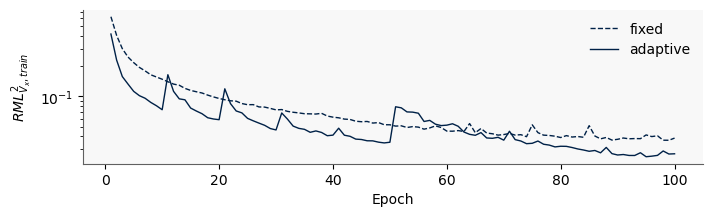

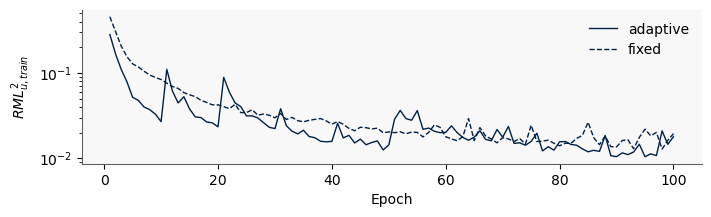

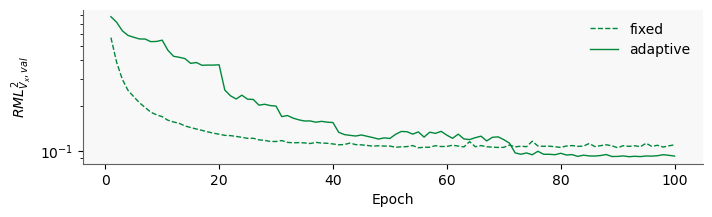

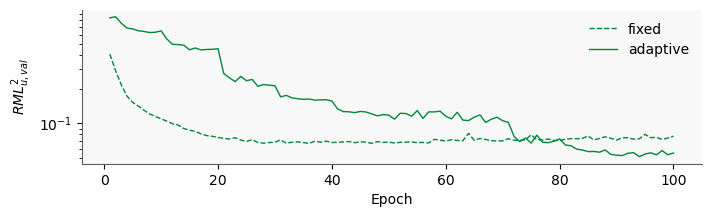

In [4]:
plot_path = os.path.join(plot_dir, 'AdQRnet_training_error.png')
plotting.training.plot(train_errors_dVdX_fix, train_errors_dVdX_ad, train_errors_U_ad, train_errors_U_fix, val_errors_dVdX_fix, val_errors_dVdX_ad, val_errors_U_fix, val_errors_U_ad)

### 1.1.2 Plain Neural Network

In [ ]:
train_errors_U_fix, train_errors_dVdX_fix, val_errors_U_fix, val_errors_dVdX_fix, summary_fix, _ = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientNN', 'fixed', seed+2)

train_errors_U_ad, train_errors_dVdX_ad, val_errors_U_ad, val_errors_dVdX_ad, summary_ad, _ = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientNN', 'adaptive', seed+3)


Data available = 4816


Training time: 6 sec

Model saved as FixNN

Data available = 636



In [ ]:
model_stats = [summary_ad, summary_fix]

utilities.print_summary(model_stats)

In [ ]:
plotting.training.plot(train_errors_dVdX_fix, train_errors_dVdX_ad, train_errors_U_ad, train_errors_U_fix, val_errors_dVdX_fix, val_errors_dVdX_ad, val_errors_U_fix, val_errors_U_ad)

## 1.2 Simulation

### Uncontrolled

In [ ]:
X0 = OCP.sample_X0(1, dist=1)

In [ ]:
control = controller.NoControl(OCP.U_bar)

In [ ]:
t, X, _ = simulate.sim_closed_loop(
    OCP.dynamics, OCP.closed_loop_jacobian, control, [0., config.t1_sim], X0,
    solver=config.ode_solver, atol=config.atol, rtol=config.rtol
)

sim_uncontrolled = {'architecture': 'uncontrolled', 't_NN': t, 'X_NN': X, 'U_NN': control.eval_U(X)}


In [ ]:
plot_path = os.path.join(plot_dir, 'sim_uncontrolled.png')
plotting.simulation.plot(plot_path, sim_uncontrolled, params)

### $\lambda$-QRnet

In [ ]:
timestamp = 'AdQRnet'

In [ ]:
sim_controlled = simulate.sim_controller(OCP, config, X0, timestamp, _model_registry, model_dir, results_dir)

In [ ]:
plot_path = os.path.join(plot_dir, 'sim_controlled.png')
plotting.simulation.plot(plot_path, sim_controlled, params)

## 1.3 Optimality Analysis

In [ ]:
test_data = scipy.io.loadmat(os.path.join(data_dir, 'valfixed.mat'))

### 1.3.1 Basic Initial Conditions

In [ ]:
X0_pool = OCP.sample_X0(config.n_trajectories_test, dist=1)
test_results_dir = os.path.join(results_dir, 'optimality')
os.makedirs(test_results_dir, exist_ok=True)
test_results_list = os.listdir(test_results_dir)

In [ ]:
simulate.optimality(test_results_dir, X0_pool, OCP, config, config.n_trajectories_test, test_data, model_dir, _model_registry)

In [ ]:
AdQRnet = scipy.io.loadmat('results/Burgers/results/optimality/AdQRnet.mat')
FixQRnet = scipy.io.loadmat('results/Burgers/results/optimality/FixQRnet.mat')
AdNN = scipy.io.loadmat('results/Burgers/results/optimality/AdNN.mat')

In [ ]:
plot_path = os.path.join(plot_dir, 'optimality_near.png')
plotting.optimality.plot(plot_path, AdQRnet, FixQRnet, AdNN)

### 1.3.2 Distant Initial Conditions

In [ ]:
X0_pool = OCP.sample_X0(config.n_trajectories_test, dist=2)

In [ ]:
simulate.optimality(test_results_dir, X0_pool, OCP, config, config.n_trajectories_test, test_data, model_dir, _model_registry)

In [ ]:
AdQRnet = scipy.io.loadmat('results/Burgers/results/optimality/AdQRnet.mat')
FixQRnet = scipy.io.loadmat('results/Burgers/results/optimality/FixQRnet.mat')
AdNN = scipy.io.loadmat('results/Burgers/results/optimality/AdNN.mat')

In [ ]:
plot_path = os.path.join(plot_dir, 'optimality_distant.png')
plotting.optimality.plot(plot_path, AdQRnet, FixQRnet, AdNN)

### 1.3.3 Difficult Initial Conditions

In [ ]:
X0_1 = scipy.io.loadmat('/Users/florian/Documents/study/mathematics_bsc/2022_23/BA/code/AdQRnet/results/Burgers/data/X0adaptive_GradientNN.mat')
X0_2 = scipy.io.loadmat('/Users/florian/Documents/study/mathematics_bsc/2022_23/BA/code/AdQRnet/results/Burgers/data/X0adaptive_GradientQRnet.mat')

X0_pool_1 = X0_1['IC']

X0_pool_2 = X0_2['IC']

# Select the first 50 columns from each
X0_pool_1 = X0_pool_1[:, :50]  # All rows, first 50 columns
X0_pool_2= X0_pool_2[:, :50]  # All rows, first 50 columns

# Then horizontally stack these two 64x50 arrays to get a 64x100 array
X0_pool = np.hstack([X0_pool_1, X0_pool_2])

X0_pool = np.hstack([X0_pool_1, X0_pool_2])

In [ ]:
simulate.optimality(test_results_dir, X0_pool, OCP, config, config.n_trajectories_test, test_data, model_dir, _model_registry)

In [ ]:
AdQRnet = scipy.io.loadmat('results/Burgers/results/optimality/AdQRnet.mat')
FixQRnet = scipy.io.loadmat('results/Burgers/results/optimality/FixQRnet.mat')
AdNN = scipy.io.loadmat('results/Burgers/results/optimality/AdNN.mat')

In [ ]:
plot_path = os.path.join(plot_dir, 'optimality_diff.png')
plotting.optimality.plot(plot_path, AdQRnet, FixQRnet, AdNN)

## 1.4 Stability Analysis

In [ ]:
save_path = os.path.join(data_dir, 'stability.mat')

if not os.path.exists(save_path):
    max_eig_fix_qrnet_list = []
    max_eig_ad_qrnet_list = []
    max_eig_fix_nn_list = []
    max_eig_ad_nn_list = []
    val_errors_U_fix_qrnet_list = []
    val_errors_U_ad_qrnet_list = []
    val_errors_U_fix_nn_list = []
    val_errors_U_ad_nn_list = []
    
    for i in range(25):
        # Assume the `train` function is defined somewhere and works as expected
        train_errors_U_fix, train_errors_dVdX_fix, val_errors_U_fix_qrnet, val_errors_dVdX_fix, summary_fix, max_eig_fix_qrnet = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientQRnet', 'fixed', seed+i)
        train_errors_U_ad, train_errors_dVdX_ad, val_errors_U_ad_qrnet, val_errors_dVdX_ad, summary_ad, max_eig_ad_qrnet = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientQRnet', 'adaptive', seed+2*i)
        train_errors_U_fix, train_errors_dVdX_fix, val_errors_U_fix_nn, val_errors_dVdX_fix, summary_fix, max_eig_fix_nn = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientNN', 'fixed', seed+3*i)
        train_errors_U_ad, train_errors_dVdX_ad, val_errors_U_ad_nn, val_errors_dVdX_ad, summary_ad, max_eig_ad_nn = algorithm.train(_model_registry, config, OCP, data_dir, model_dir, 'GradientNN', 'adaptive', seed+4*i)
    
        # Append tuples (max_eig, val_errors_U) to lists
        max_eig_fix_qrnet_list.append((max_eig_fix_qrnet, val_errors_U_fix_qrnet[-1]))
        max_eig_ad_qrnet_list.append((max_eig_ad_qrnet, val_errors_U_ad_qrnet[-1]))
        max_eig_fix_nn_list.append((max_eig_fix_nn, val_errors_U_fix_nn[-1]))
        max_eig_ad_nn_list.append((max_eig_ad_nn, val_errors_U_ad_nn[-1]))
    
    # Dictionary to save as MATLAB file
    data_dict = {
        'max_eig_fix_qrnet': max_eig_fix_qrnet_list,
        'max_eig_ad_qrnet': max_eig_ad_qrnet_list,
        'max_eig_fix_nn': max_eig_fix_nn_list,
        'max_eig_ad_nn': max_eig_ad_nn_list,
    }
    
    scipy.io.savemat(save_path, data_dict)
    
data = scipy.io.loadmat(save_path)


In [ ]:
plot_path = os.path.join(plot_dir, 'staility.png')
plotting.stability.plot(plot_path, data)